### **INIT**

In [ ]:
!pip install tf-keras-vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 664.9 kB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

In [ ]:
model = keras.models.load_model('/content/X-Brain.keras')
model.summary()

Model: "x_brain"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 16)         448       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 16)         448       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                             

In [ ]:
def preprocess_image(img):
    img = img_to_array(img)
    img /= 255
    img = np.expand_dims(img, axis=0)

    return img

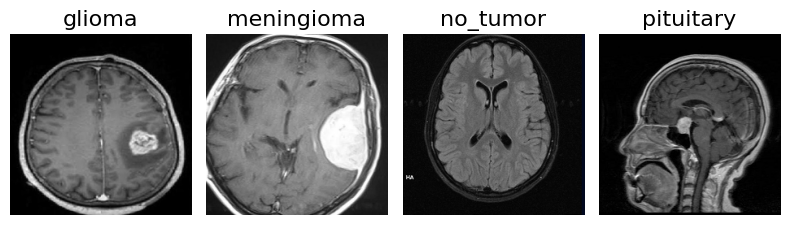

In [ ]:
class_names = ["glioma", "meningioma", "no_tumor", "pituitary"]

# Load images
glioma = load_img('/content/glioma.jpg', target_size=(224, 224))
meningioma = load_img('/content/meningioma.jpg', target_size=(224, 224))
no_tumor = load_img('/content/no_tumor.jpg', target_size=(224, 224))
pituitary = load_img('/content/pituitary.jpg', target_size=(224, 224))
images = [glioma, meningioma, no_tumor, pituitary]

X = [preprocess_image(img) for img in images]
seed_input = np.concatenate(X, axis=0)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=len(class_names), figsize=(8, 4))
for i, title in enumerate(class_names):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### **Utilities**

In [ ]:
# Replacing Softmax with Linear Activation
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
replace2linear = ReplaceToLinear()

In [ ]:
# Obtaining Target Scores
from tf_keras_vis.utils.scores import CategoricalScore
score = CategoricalScore([0, 1, 2, 3]) # 0: glioma, 1: meningioma, 2: no_tumor, 3: pituitary

### **Grad-CAM**

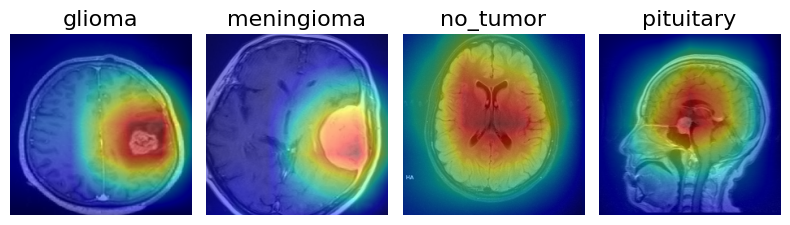

In [ ]:
from tf_keras_vis.gradcam import Gradcam

# Gradcam object
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap
heatmap_gradcam = gradcam(score,
              seed_input,
              penultimate_layer=-1)


# Render
f, ax = plt.subplots(nrows=1, ncols=len(class_names), figsize=(8, 4))
for i, title in enumerate(class_names):
    heatmap = np.uint8(cm.jet(heatmap_gradcam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### **Grad-CAM++**

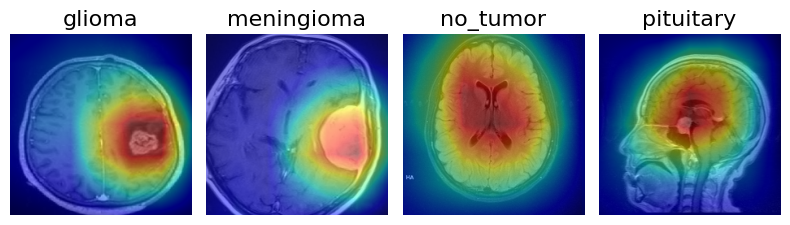

In [ ]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

# Create GradCAM++ object
gradcam_pp = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

# Generate heatmap
heatmap_gradcam_pp = gradcam_pp(score,
              seed_input,
              penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 4))
for i, title in enumerate(class_names):
    heatmap = np.uint8(cm.jet(heatmap_gradcam_pp[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### **Score-CAM**

32/32 [==============================] - 9s 229ms/step


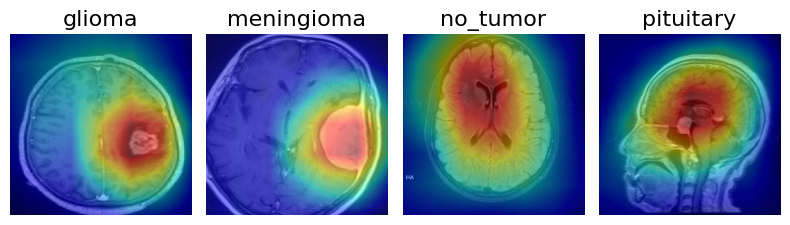

In [ ]:
from tf_keras_vis.scorecam import Scorecam

# Create ScoreCAM object
scorecam = Scorecam(model)

# Generate heatmap
heatmap_scorecam = scorecam(score, seed_input, penultimate_layer=-1)


# Render
f, ax = plt.subplots(nrows=1, ncols=len(class_names), figsize=(8, 4))
for i, title in enumerate(class_names):
    heatmap = np.uint8(cm.jet(heatmap_scorecam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### **Visualization**

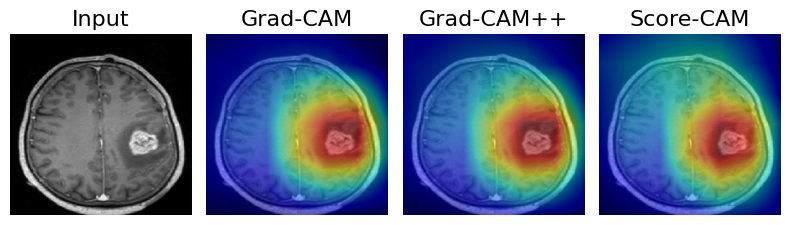

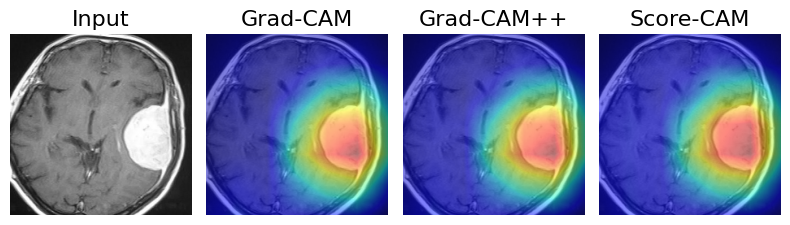

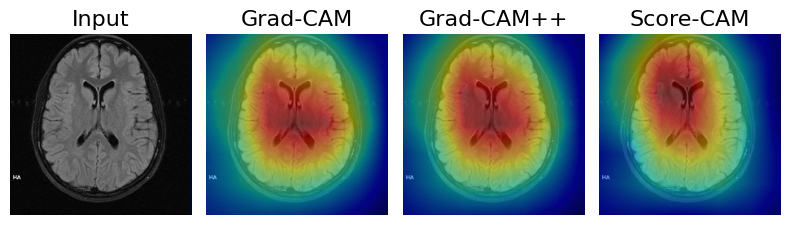

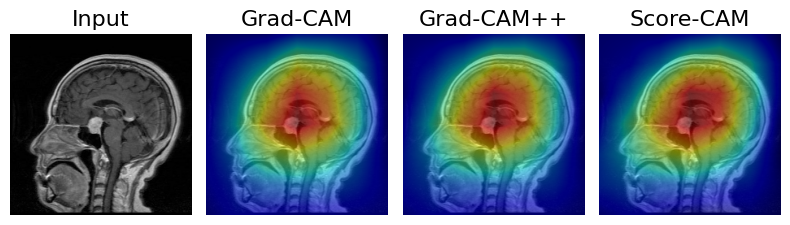

In [ ]:
cmap = 'jet'
alpha = 0.5

for i, title in enumerate(class_names):
    f, ax = plt.subplots(nrows=1, ncols=len(class_names), figsize=(8, 4))

    ax[0].set_title('Input', fontsize=16)
    ax[0].imshow(images[i])
    ax[0].axis('off')

    # Plot GradCAM
    heatmap = np.uint8(cm.jet(heatmap_gradcam[i])[..., :3] * 255)
    ax[1].set_title('Grad-CAM', fontsize=16)
    ax[1].imshow(images[i])
    ax[1].imshow(heatmap, cmap=cmap, alpha=alpha)
    ax[1].axis('off')

    # Plot GradCAM++
    heatmap = np.uint8(cm.jet(heatmap_gradcam_pp[i])[..., :3] * 255)
    ax[2].set_title('Grad-CAM++', fontsize=16)
    ax[2].imshow(images[i])
    ax[2].imshow(heatmap, cmap=cmap, alpha=alpha)
    ax[2].axis('off')

    # Plot ScoreCAM
    heatmap = np.uint8(cm.jet(heatmap_scorecam[i])[..., :3] * 255)
    ax[3].set_title('Score-CAM', fontsize=16)
    ax[3].imshow(images[i])
    ax[3].imshow(heatmap, cmap=cmap, alpha=alpha)
    ax[3].axis('off')

    plt.tight_layout()
    plt.savefig(f'/content/XAI_{title}.pdf', format='pdf', dpi=600, bbox_inches='tight')
    plt.show()


### **THE END**